<a href="https://colab.research.google.com/github/BorisAnimal/TSA-colabs/blob/main/%5BTSA%5D_self_oscillations_period1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from matplotlib.pyplot import *

In [ ]:
plt.rcParams['figure.figsize'] = [12, 4]

In [ ]:
L0 = 160 * 1e-3
r0 = 0.74 * 1e-3
m = 2.85
I = 9.48e-7
tau_c = 1.91 * 1e-3
b_theta = 1.31 * 1e-6
F_c = 4.11
b_x = 9.46 
Kr_star = 11.75 * 1e3
KL_star = 9.98  * 1e3

g = 9.81

system_params = {
    'm': m,
    'I': I,
    'L0': L0,
    'r0': r0,
    'b_x': b_x,
    'b_theta': b_theta,
    'g': g,
    'K': 0.1,
    'u_max': 0.001
}

# Period stuff

$$ T = \frac{2\pi}{R}\sqrt{\frac{IL}{mg}} $$

## Приложить малый момент с частотой $T$ 

In [ ]:
T = np.sqrt(I*L0/(m*g))* 2 * np.pi / r0
T

0.6253963970716192

0.27958500000000003


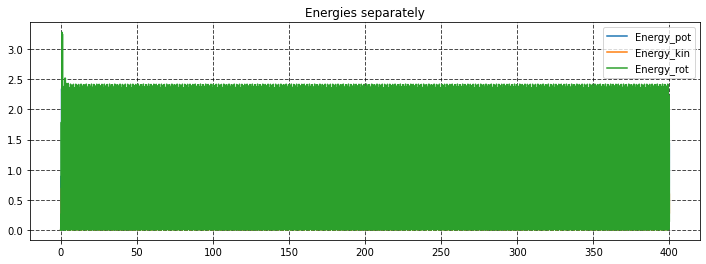

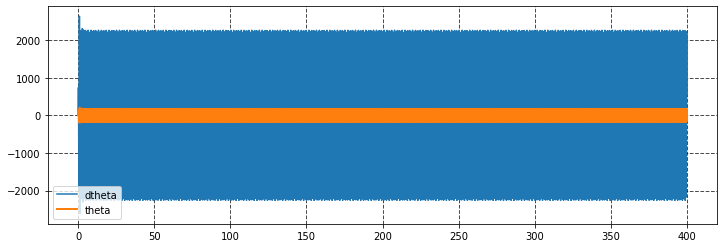

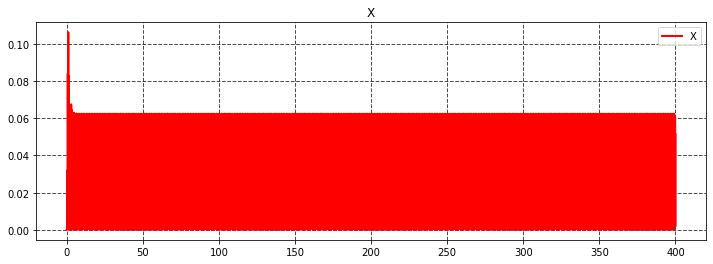

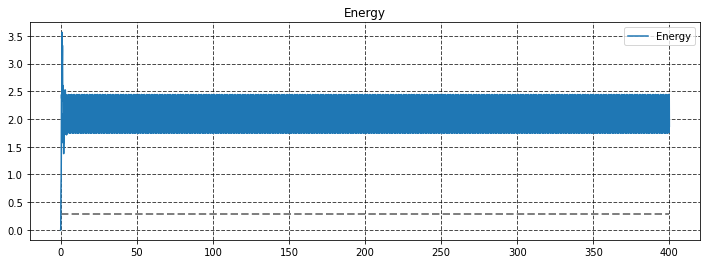

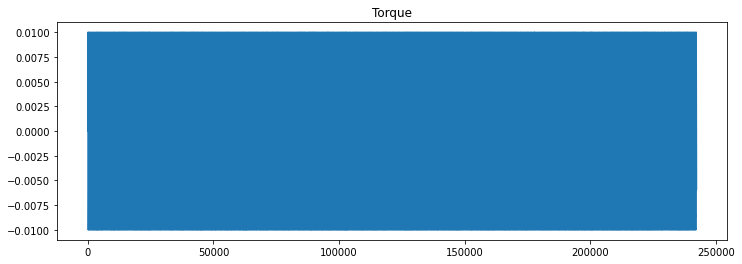

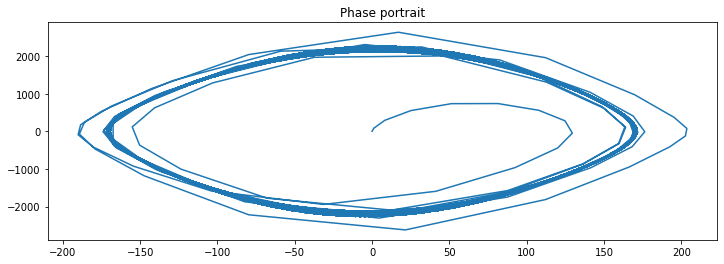

In [ ]:
def sys_ode(state, t, system_params, E_d):
    # Unpack variables
    m = system_params['m']
    I = system_params['I']
    L0 = system_params['L0']
    r0 = system_params['r0']
    b_x = system_params['b_x']
    b_theta = system_params['b_theta']
    g = system_params['g']
    K = system_params['K']
    u_max = system_params['u_max']
    # Unpack state
    [theta, dtheta] = state 
    # Jacobian
    L_X = np.sqrt(L0**2 - (theta*r0)**2)
    J = theta * r0**2 / (L_X)
    dx = J * dtheta
    x = L0 - L_X
    tmp = L0**2 - r0**2*theta**2
    dJ = dtheta*r0**2*(1/np.sqrt(tmp) + r0**2*theta**2/tmp**1.5)
    # Control
    u = 1e-2*np.sin(2*np.pi*t/T)
    u_buffer.append(u)
    ddtheta = 1/(I + m*J**2) * (u - J*( m*g + b_x*dx) - (b_theta + J*m*dJ) * dtheta)
    # ddtheta = 1/(I + m*J**2) * (u - J*m*g - J*m*dJ * dtheta)
    return dtheta, ddtheta

system_params = {
    'm': m,
    'I': I,
    'L0': L0,
    'r0': r0,
    'b_x': b_x,
    'b_theta': b_theta,
    'g': g,
    'K': 0.1,
    'u_max': 0.001
}

def energy(m,I,g,x,dx,dtheta):
    return m*dx**2/2 + I*dtheta**2/2 + m*g*x


#################### Initialization ####################
t0 = 0
tf = 400 # Final time
N = int(1E4) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

init_state = [0,0]
x_d = 0.01
E_d = energy(m,I,g,x_d,0,0)
print(E_d)

u_buffer = []

#################### ODE solution ####################
sol = odeint(sys_ode, init_state, t, args=(system_params, E_d))
theta, dtheta = sol[:,0], sol[:,1]
u_buffer = np.array(u_buffer)

#################### Energy computation ####################
L_X = np.sqrt(L0**2 - (theta*r0)**2)
J = theta * r0**2 / (L_X)
dX = J * dtheta
x = L0 - L_X
E = energy(m,I,g,x, dX,dtheta)

E_pot = m*g*x
E_kin = m*dX**2/2
E_rot = I*dtheta**2/2
hlines(E_d, t.min(), t.max(), color = 'gray', linestyles='--', linewidth=2.0)
plot(t, E_pot, label='Energy_pot')
plot(t, E_kin, label='Energy_kin')
plot(t, E_rot, label='Energy_rot')
title("Energies separately")
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
# ylim([min(E), max(max(E), E_d)*1.1])
show()


# ################### Data normalization ####################
# E_d = E_d / E.max()
# E = E / E.max()
# dtheta = dtheta / dtheta.max()
# theta = theta / theta.max()
# x_d = x_d / x.max()
# dX = dX / dX.max()
# x = x / x.max()

#################### Plots ####################
# Simulated trajectory (theta)
plot(t, dtheta, linewidth=1.5, label='dtheta')
plot(t, theta, linewidth=2.0, label='theta')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
show()

## Simulated trajectory (x, dx)
hlines(x_d, t.min(), t.max(), color = 'black', linestyles='--', linewidth=2.0)
plot(t, x, 'r', linewidth=2.0, label='X')
# plot(t, dX, label='dX')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
title("X")
show()

## Simulated trajectory (Energy)
hlines(E_d, t.min(), t.max(), color = 'gray', linestyles='--', linewidth=2.0)
plot(t, E, label='Energy')
title("Energy")
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
show()

# Simulated trajectory (torque applied)
plot(u_buffer)
title("Torque")
show()

plot(theta, dtheta)
title("Phase portrait")
show()

## Собственные колебания без трения с минимальной начальной энергией

In [ ]:
theta0 = 30
alpha = r0/L0*theta0
alpha

0.13874999999999998

0.27958500000000003


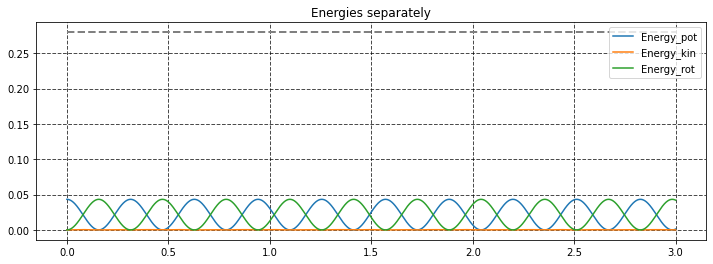

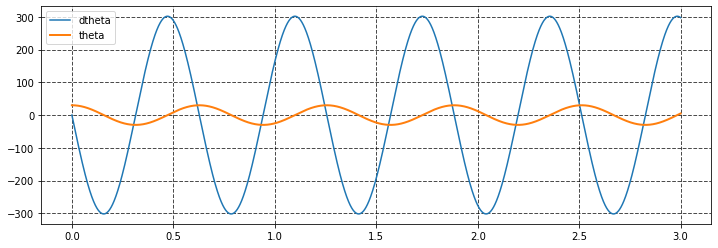

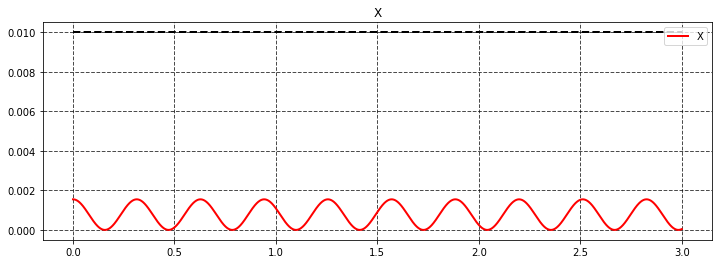

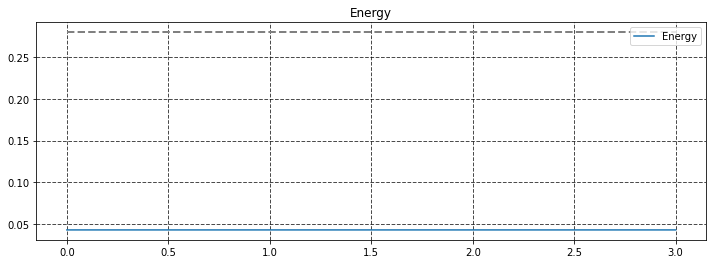

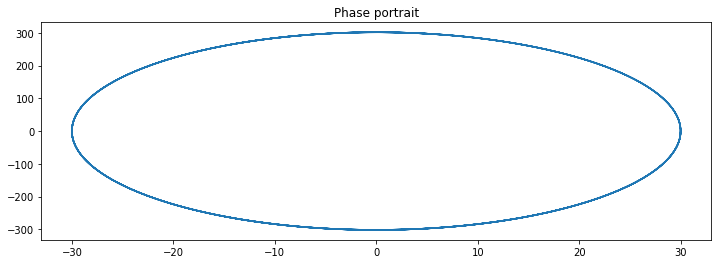

In [ ]:
def sys_ode(state, t, system_params, E_d):
    # Unpack state
    [theta, dtheta] = state 
    # Jacobian
    L_X = np.sqrt(L0**2 - (theta*r0)**2)
    J = theta * r0**2 / (L_X)
    dx = J * dtheta
    x = L0 - L_X
    # dJ = r0**2/(L_X) + theta*r0**2/(L0 -x)**2
    tmp = L0**2 - r0**2*theta**2
    dJ = dtheta*r0**2*(1/np.sqrt(tmp) + r0**2*theta**2/tmp**1.5)
    # Current energy
    E = energy(m,I,g,x,dx,dtheta)
    # Control
    u = 0.0
#     u = 1e-3*np.cos(2*np.pi*t/T)
#     u_buffer.append(u)
    
#     ddtheta = 1/(I + m*J**2) * (u - J*( m*g + b_x*dx) - (b_theta + J*m*dJ) * dtheta)
    ddtheta = 1/(I + m*J**2) * (u - J*m*g - J*m*dJ * dtheta)
    return dtheta, ddtheta


def energy(m,I,g,x,dx,dtheta):
    return m*dx**2/2 + I*dtheta**2/2 + m*g*x


#################### Initialization ####################
t0 = 0
tf = 3 # Final time
N = int(1E4) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

init_state = [theta0,0]
x_d = 0.01
E_d = energy(m,I,g,x_d,0,0)
print(E_d)

u_buffer = []

#################### ODE solution ####################
sol = odeint(sys_ode, init_state, t, args=(system_params, E_d))
theta, dtheta = sol[:,0], sol[:,1]
u_buffer = np.array(u_buffer)

#################### Energy computation ####################
L_X = np.sqrt(L0**2 - (theta*r0)**2)
J = theta * r0**2 / (L_X)
dX = J * dtheta
x = L0 - L_X
E = energy(m,I,g,x, dX,dtheta)

E_pot = m*g*x
E_kin = m*dX**2/2
E_rot = I*dtheta**2/2
hlines(E_d, t.min(), t.max(), color = 'gray', linestyles='--', linewidth=2.0)
plot(t, E_pot, label='Energy_pot')
plot(t, E_kin, label='Energy_kin')
plot(t, E_rot, label='Energy_rot')
title("Energies separately")
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
# ylim([min(E), max(max(E), E_d)*1.1])
show()


# ################### Data normalization ####################
# E_d = E_d / E.max()
# E = E / E.max()
# dtheta = dtheta / dtheta.max()
# theta = theta / theta.max()
# x_d = x_d / x.max()
# dX = dX / dX.max()
# x = x / x.max()

#################### Plots ####################
# Simulated trajectory (theta)
plot(t, dtheta, linewidth=1.5, label='dtheta')
plot(t, theta, linewidth=2.0, label='theta')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
show()

## Simulated trajectory (x, dx)
hlines(x_d, t.min(), t.max(), color = 'black', linestyles='--', linewidth=2.0)
plot(t, x, 'r', linewidth=2.0, label='X')
# plot(t, dX, label='dX')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
title("X")
show()

## Simulated trajectory (Energy)
hlines(E_d, t.min(), t.max(), color = 'gray', linestyles='--', linewidth=2.0)
plot(t, E, label='Energy')
title("Energy")
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
show()

## Simulated trajectory (torque applied)
# plot(u_buffer)
# title("Torque")
# show()

plot(theta, dtheta)
title("Phase portrait")
show()

## Апроксимация периода

In [ ]:
def period_aproximation(theta,t):
    """
    Checks when sign of time series flips. 
    """
    
    z = []
    for i, v in enumerate(theta[1:]*theta[:-1] < 0):
        if v:
            z.append(t[i])
    a = []
    for i in range(len(z) - 1):
        a.append(z[i+1] - z[i])
        # print(a[-1]) # for debug
        
#     plt.plot(a)
#     plt.show()
    if len(a) > 0:
        T_aprox = 2 * np.mean(a)
    else:
        T_aprox = 0.0
    return T_aprox

T_aprox = period_aproximation(theta,t)
T, T_aprox

(0.6253963970716192, 0.628062806280628)

## Период от начального положения

### Нелинейный период

In [ ]:
from scipy import integrate

def T_non_num(theta0,r0=r0, L0=L0, m=m, I=I): # R,L,m,I,
    def f(theta):
        J = theta*r0**2/sqrt(L0**2 - theta**2*r0**2)
        D = I+m*J**2
        E0 = m*g*(L0-sqrt(L0**2 - theta0**2*r0**2))
        P = m*g*(L0-sqrt(L0**2 - theta**2*r0**2))
        return sqrt(D/(E0 - P))
    quad = integrate.quad(f, 0, theta0)[0]
    return 4 * quad / 2**0.5

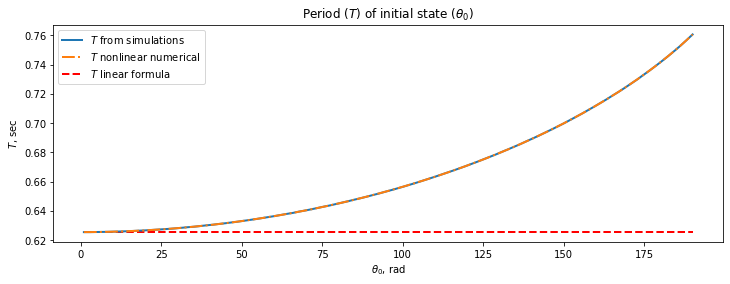

In [ ]:
pers = []
pers_non = []
thetas0 = np.linspace(1,190,100)
for theta0 in thetas0:
    init_state = [theta0,0]
    theta = odeint(sys_ode, init_state, t, args=(system_params, E_d))[:,0]
    pers.append(period_aproximation(theta,t))
    pers_non.append(T_non_num(theta0))
    
plt.title(r'Period ($T$) of initial state ($\theta_0$)')
plt.plot(thetas0, pers, linewidth=2, label=r'$T$ from simulations')
plt.plot(thetas0, pers_non, linewidth=2, linestyle='-.', label=r'$T$ nonlinear numerical')
plt.hlines(T, min(thetas0), max(thetas0), color = 'red', linestyles='--', linewidth=2.0, label=r'$T$ linear formula')
plt.legend()
plt.xlabel(r'$\theta_0$, rad')
plt.ylabel(r'$T$, sec')
plt.show()

### Горизонтальная установка

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


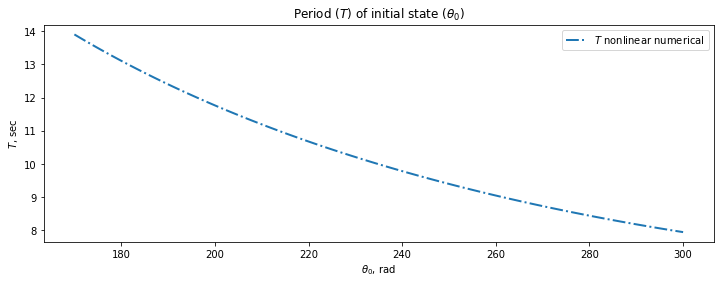

In [ ]:
system_params = {'I': 0.0003,
 'L0': 0.38,
 'g': 9.81,
 'm': 1.25,
 'r0': 0.00074}


def sys_ode(state, t, system_params, E_d):
    # Unpack state
    [theta, dtheta] = state 
    # Jacobian
    L_X = np.sqrt(L0**2 - (theta*r0)**2)
    J = theta * r0**2 / (L_X)
    dx = J * dtheta
    x = L0 - L_X
    
    tmp = L0**2 - r0**2*theta**2
    dJ = dtheta*r0**2*(1/np.sqrt(tmp) + r0**2*theta**2/tmp**1.5)
    # Current energy
    E = energy(m,I,g,x,dx,dtheta)
    # Control
    u = 0.0
    ddtheta = 1/(I + m*J**2) * (u - J*m*g - J*m*dJ * dtheta)
    return dtheta, ddtheta


def T_non_num(theta0,r0=r0, L0=L0, m=m, I=I, h=0.18, Rr=0.05): # R,L,m,I,
    def f(theta):
        J = theta*r0**2/sqrt(L0**2 - theta**2*r0**2)
        D = I+m*J**2
        x0 = (L0-sqrt(L0**2 - theta0**2*r0**2))
        E0 = m*g*h*(1-np.cos(x0/Rr))
        P = m*g*h*(1-np.cos(L0-sqrt(L0**2 - theta**2*r0**2)))
        return sqrt(D/(E0 - P))
    quad = integrate.quad(f, 0, theta0)[0]
    return 2**1.5 * quad

T = 2*np.pi/r0*np.sqrt(0.0003*0.38/1.25/9.81)

pers = []
pers_non = []
thetas0 = np.linspace(170,300,100)
for theta0 in thetas0:
    init_state = [theta0,0]
    theta = odeint(sys_ode, init_state, t, args=(system_params, E_d))[:,0]
    pers.append(period_aproximation(theta,t))
    pers_non.append(T_non_num(theta0, r0, 0.38, 2.25, 0.0003))
    
plt.title(r'Period ($T$) of initial state ($\theta_0$)')
# plt.plot(thetas0, pers, linewidth=2, label=r'$T$ from simulations')
plt.plot(thetas0, pers_non, linewidth=2, linestyle='-.', label=r'$T$ nonlinear numerical')
# plt.hlines(T, min(thetas0), max(thetas0), color = 'red', linestyles='--', linewidth=2.0, label=r'$T$ linear formula')
plt.legend()
plt.xlabel(r'$\theta_0$, rad')
plt.ylabel(r'$T$, sec')
plt.show()

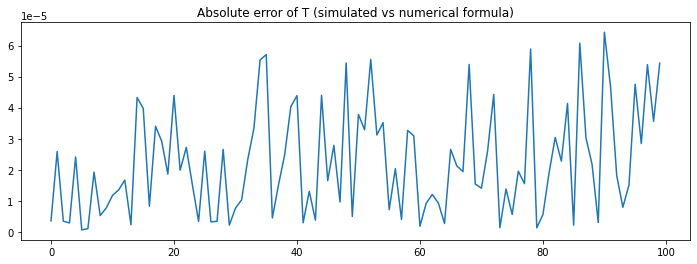

In [ ]:
plt.title("Absolute error of T (simulated vs numerical formula)")
plt.plot([abs(a-b) for a,b in zip(pers,pers_non)])
plt.show()

In [ ]:
theta = 110
X = L0 - sqrt(L0**2 - (theta*r0)**2)
X

0.02225371148375721

## Новый подход к симуляции

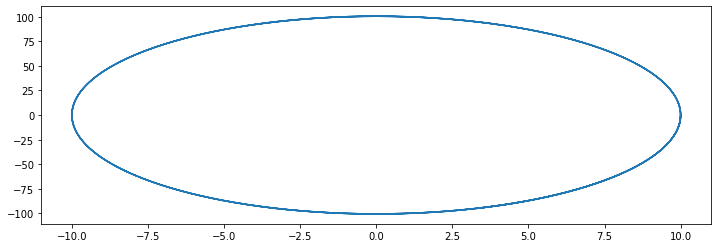

In [ ]:
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

sys_params = Struct(**system_params)

def control(state, system_params, **kwargs):
    [theta, dtheta] = state 
    u = 0.0
    return u
    
def dynamic(state, t, u, system_params):
    p = system_params
    # Unpack state
    [theta, dtheta] = state 
    # Jacobian
    L_X = np.sqrt(p.L0**2 - (theta*p.r0)**2)
    J = theta * p.r0**2 / (L_X)
    dx = J * dtheta
    x = p.L0 - L_X
    tmp = L0**2 - p.r0**2*theta**2
    dJ = dtheta*p.r0**2*(1/np.sqrt(tmp) + p.r0**2*theta**2/tmp**1.5)
    
    #ddtheta = 1/(I + m*J**2) * (u - J*m*g - J*m*dJ * dtheta)
    ddtheta = (u - J*p.m*p.g - p.m*J*dJ*dtheta) / (p.I + p.m*J**2)
    return dtheta, ddtheta

def simulator(control, dynamic, x0, system_params, t=2, control_hz=100, between_steps=20, **kwargs):
    total_steps = t*control_hz*between_steps

    control_params=kwargs.get('control_params', system_params)

    x = None
    for t in range(int(t*control_hz)):
        u = control(x0, control_params, **kwargs)
        xi = odeint(dynamic, x0, np.linspace(0,1/control_hz,between_steps), args=(u,system_params))
        if x is not None:
            x = np.vstack([x,xi])
        else:
            x = xi
        x0 = x[-1]
    return x

# Noizy control params
control_params = dict()
np.random.seed(42)
for k,v in system_params.items():
    control_params[k] = v * np.random.normal(1,0.5)
control_params = Struct(**control_params)

sol = simulator(control, dynamic, [10,0], sys_params, t=2,
                control_params=control_params)
theta, dtheta = sol[:,0], sol[:,1]

plt.plot(theta,dtheta)
plt.show()

In [ ]:
system_params

{'I': 9.48e-07,
 'K': 0.1,
 'L0': 0.16,
 'b_theta': 1.31e-06,
 'b_x': 9.46,
 'g': 9.81,
 'm': 2.85,
 'r0': 0.00074,
 'u_max': 0.001}

## Данные с установки

In [ ]:
! rm tsa_ff*
! gdown --id 1rli2kTnv_60BFeFaOufSH8tX1t2auOGy
! unzip tsa_ff_.zip

Downloading...
From: https://drive.google.com/uc?id=1rli2kTnv_60BFeFaOufSH8tX1t2auOGy
To: /content/tsa_ff_.zip
100% 198k/198k [00:00<00:00, 62.6MB/s]
Archive:  tsa_ff_.zip
  inflating: tsa_ff_36.csv           
  inflating: tsa_ff_57.csv           
  inflating: tsa_ff_80.csv           
  inflating: tsa_ff_95.csv           
  inflating: tsa_ff_108.csv          
  inflating: tsa_ff_114.csv          


In [ ]:
def period_aproximation(theta,t):
    """
    Checks when sign of time series intersect. 
    """
    
    z = []
    for i, v in enumerate(theta[1:]*theta[:-1] < 0):
        if v:
            z.append(t[i])
    a = []
    for i in range(len(z) - 1):
        a.append(z[i+1] - z[i])
        # print(a[-1]) # for debug
        
    # plt.plot(a)
    # plt.show()
    if len(a) > 0:
        T_aprox = 2 * np.mean(a[:2])
        # T_aprox = 2 * a[0]
    else:
        T_aprox = 0.0
    return T_aprox

Ts = []
As = [36,57,80,95,108,114]
for i in As:
    print(i)
    data = np.genfromtxt('tsa_ff_{}.csv'.format(i), delimiter=' ')
    # ['time','theta', 'dtheta', 'x', 'dx','u']

    

    a = 200
    b = 500
    t = data[a:b,0]
    theta = data[a:b,1]
    # theta -= theta[-1]

    T = period_aproximation(theta, t)
    Ts.append(T)

    # plt.plot(t, theta)
    # plt.show()
    
    print(T, '\n=======================\n')
    # break

36
0.876226566999776 

57
0.9062265259999549 

80
0.972255701999984 

95
0.9785119399998621 

108
1.0070956849999675 

114
1.0202532140001495 



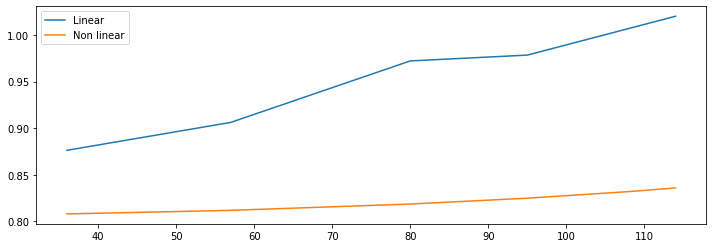

In [ ]:
 # R,L,m,I,
Ts_non = [T_non_num(theta0, 0.98e-3, 0.16, 1.25 + 0.3, 15e-7) for theta0 in As]
plt.plot(As, Ts, label='Linear')
plt.plot(As, Ts_non, label='Non linear')
plt.legend()
plt.show()

In [ ]:
Rs = []
for i in As:
    print(i)
    data = np.genfromtxt('tsa_ff_{}.csv'.format(i), delimiter=' ')
    # ['time','theta', 'dtheta', 'x', 'dx','u']
    x = data[:, 3].reshape((-1,1)) / 1000
    theta = data[:,1].reshape(-1,1)
    # x[:,:50] # cm??
    # print(x)

    r = np.linalg.pinv(theta**2)@(2*L0*x - x**2)
    r = r.flatten()[0]**0.5
    Rs.append(r)
    print(r)
    print('=============================')
    # break

r = np.mean(Rs)
r

36
0.0008935155190445008
57
0.0008723909858766556
80
0.0008452364461822192
95
0.0008291347586801389
108
0.0008130723637342606
114
0.0008049056137626587


0.0008430426145467389

$$ T = \frac{2\pi}{R}\sqrt{\frac{IL}{mg}} $$

In [ ]:
L = 0.16
m = 1.25+0.3
g = 9.81
T = Ts[0]
I = (T*r/2/np.pi)**2 / L*m*g
I

1.3135689555525483e-06

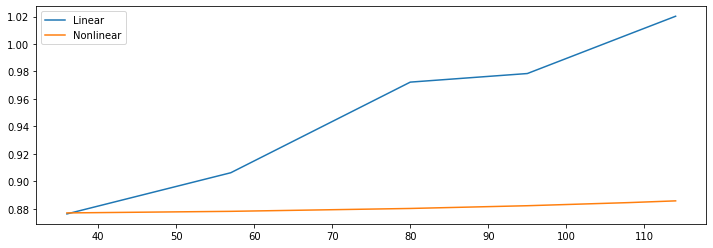

In [ ]:
 # R,L,m,I,
Ts_non = [T_non_num(theta0, r, 0.16, m, I) for theta0 in As]
plt.plot(As, Ts, label='Linear')
plt.plot(As, Ts_non, label='Nonlinear')
plt.legend()
plt.show()